# Plotting K-band settings
## Proposal from Paul B. 2020-04-03

In [ ]:
# Importing the usual culprits
import numpy as np
import matplotlib.pyplot as plt
import pickle
from matplotlib import cm
import pandas
# Color scheme for detector coverage
cc = cm.Dark2(np.linspace(0,1,9))

 Loading a synthetic spectrum for a star with $T_\text{eff}$ = 4000 K, log(g) = 4.0, $R=10^5$

In [126]:
# Loading synthetic spectrum
wave,spec =  pickle.load( open( "../spectrum-synthesis/spectrum.p", "rb" ) )
wave = wave*0.1

# Loading wavelength table
wlt = pickle.load( open( "crmcfgWLEN_20200403_extracted.pickle", "rb" ) )

In [124]:
# Plotting routine
def plot_spec(w,s,lines,xmin,nx,dx,outfile):
    # plot settings
    plt.rcParams['figure.figsize'] = [12, 4*nx]
    plt.rcParams['font.size'] = 14
    plt.rcParams['font.family'] = "DejaVu Sans"
    plt.suptitle('Temp wave table from Paul 2020-04-03')
    # ranging on the number of plots
    for i in range(nx):
        plt.subplot(nx,1,i+1)
        plt.xlim(xmin+i*dx,xmin+(i+1)*dx)
        plt.ylim(0.0,1.25)
        for j in range(len(lines)):
            for ii in range(10):
                if ii == 0 and i == 0:
                    plt.hlines(1.05+j*0.05,np.float(wlt.iloc[lines[j],73+ii]) , np.float(wlt.iloc[lines[j],83+ii]),color=cc[j],alpha=0.5, linewidth=5, label=wlt.iloc[lines[j],0])
                    plt.hlines(1.05+j*0.05,np.float(wlt.iloc[lines[j],93+ii]) , np.float(wlt.iloc[lines[j],103+ii]),color=cc[j],alpha=0.5, linewidth=5)
                    plt.hlines(1.05+j*0.05,np.float(wlt.iloc[lines[j],113+ii]) , np.float(wlt.iloc[lines[j],123+ii]),color=cc[j],alpha=0.5, linewidth=5)
                else:
                    plt.hlines(1.05+j*0.05,np.float(wlt.iloc[lines[j],73+ii]) , np.float(wlt.iloc[lines[j],83+ii]),color=cc[j],alpha=0.5, linewidth=5)
                    plt.hlines(1.05+j*0.05,np.float(wlt.iloc[lines[j],93+ii]) , np.float(wlt.iloc[lines[j],103+ii]),color=cc[j],alpha=0.5, linewidth=5)
                    plt.hlines(1.05+j*0.05,np.float(wlt.iloc[lines[j],113+ii]) , np.float(wlt.iloc[lines[j],123+ii]),color=cc[j],alpha=0.5, linewidth=5)
               
        if i == nx-1:
            plt.xlabel('Wavelength / nm')
        if i == 0:
            plt.legend(loc="lower left")
        plt.plot(w,s)
    
    plt.savefig(outfile+'.pdf')
    plt.show()
        

# K-band

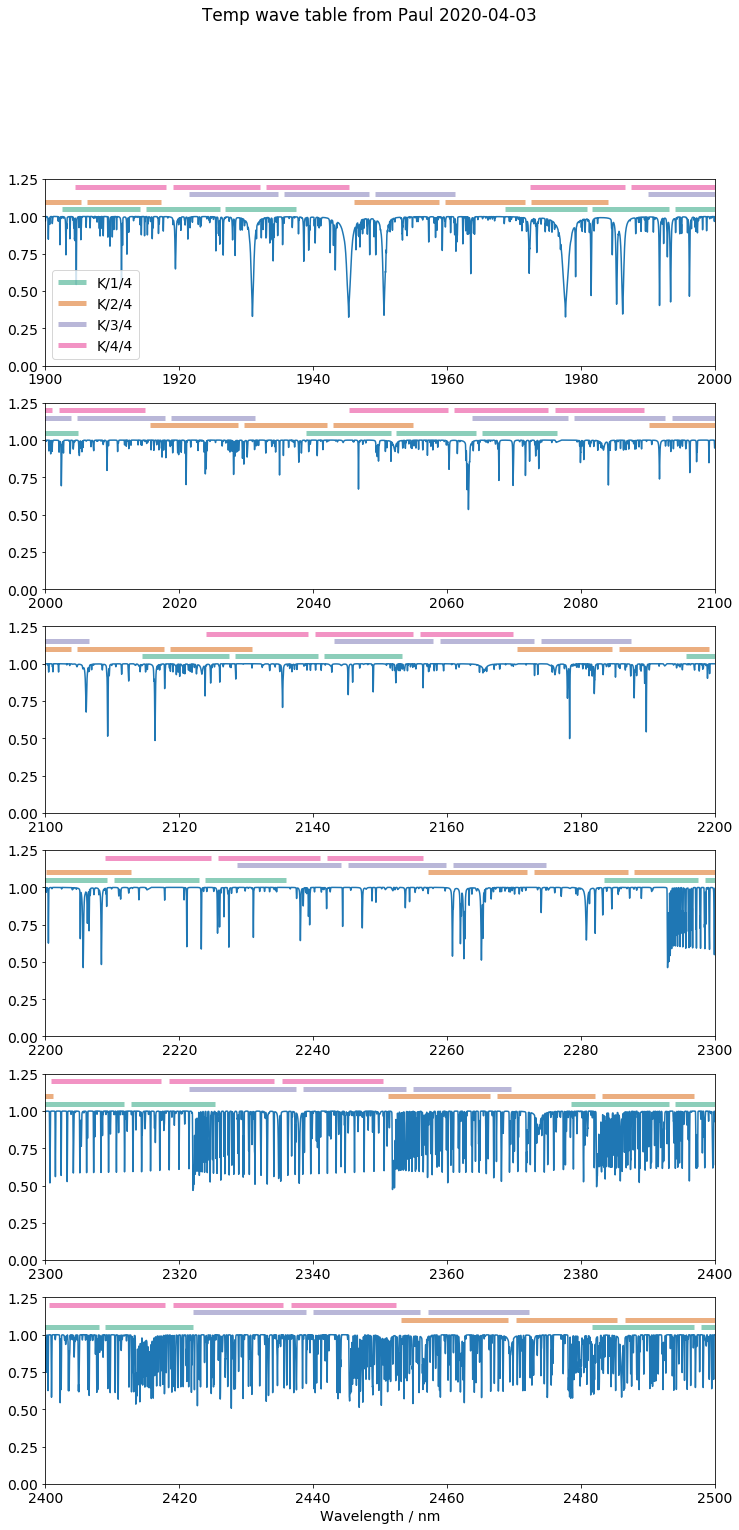

In [127]:
w,s = wave[np.where(wave>1800)],spec[np.where(wave>1800)]
lines = np.array([10,11,12,13])
plot_spec(w,s,lines,1900,6,100,'K')